In [1]:
from Neuron_analysis_tool.load import Analyzer, long_pulse_protocol
from neuron import gui, h
import numpy as np
import os
import matplotlib.pyplot as plt
from copy import deepcopy

NEURON: unable to open font "*helvetica-medium-r-normal*--14*", using "fixed"


In [2]:

def Rin_func(seg):
    imp = h.Impedance(seg.x, sec=seg.sec)
    imp.loc(seg.x, sec=seg.sec)
    imp.compute(0, 1)
    return imp.input(seg.x, sec=seg.sec)


In [2]:

analyser = Analyzer(type='Rall_tree')
colors_dict  = analyser.colors_dict
colors_dict['soma']='r'
colors_dict['basal']='pink'

analyser.change_color_dict(colors_dict)

open_morph:  /ems/elsc-labs/segev-i/yoni.leibner/PycharmProjects/Neuron_analysis_tool/Neuron_analysis_tool/data/Rall_tree5.swc


optimizing lines: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 50612.47it/s]


<AxesSubplot:>

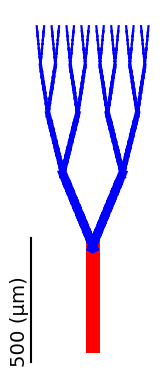

In [3]:
analyser.plot_morph(scale=500, diam_factor=1)

optimizing lines: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 53027.50it/s]


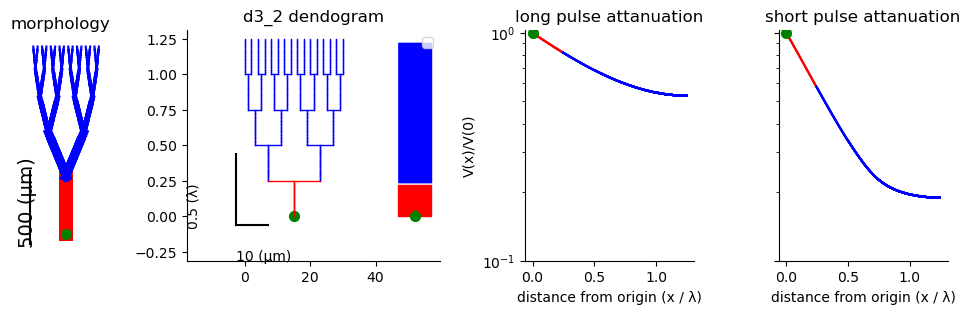

In [4]:
fig, ax = analyser.create_card(scale=500, start_seg=list(analyser.cell.soma[0])[0], diam_factor=1)

optimizing lines: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 24672.38it/s]


(<Figure size 1200x300 with 4 Axes>,
 array([<AxesSubplot:title={'center':'morphology'}>,
        <AxesSubplot:title={'center':'d3_2 dendogram'}>,
        <AxesSubplot:title={'center':'long pulse attanuation'}, xlabel='distance from origin (x / λ)', ylabel='V(x)/V(0)'>,
        <AxesSubplot:title={'center':'short pulse attanuation'}, xlabel='distance from origin (x / λ)'>],
       dtype=object))

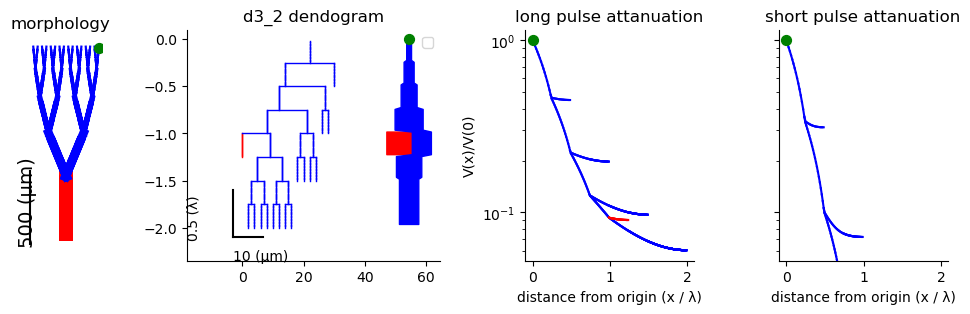

In [5]:
analyser.create_card(scale=500, start_seg=list(analyser.cell.apic[29])[-1], diam_factor=1)

optimizing lines: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 79525.03it/s]


Text(0, 0.5, 'Rin (M ohm)')

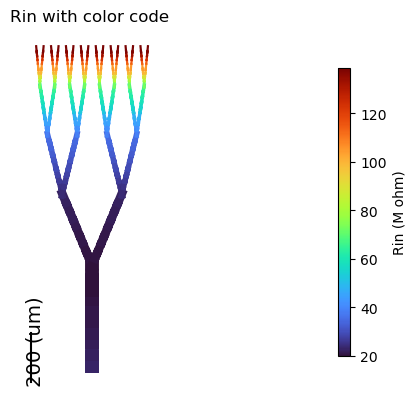

In [7]:
plt.title('Rin with color code')
analyser.plot_morph_with_value_func(func = Rin_func, run_time=1000, theta=0, diam_factor=1, scale=200)
plt.ylabel('Rin (M ohm)')


In [8]:
for sec in analyser.cell.all:
    lamda = ((1.0/sec.g_pas/sec.Ra) * (sec.diam/10000.0/4.0))**0.5 * 10000.0
    print('name:',sec, ', e_length:',round(sec.L/lamda, 3), ', diam:', sec.diam)

name: allen_model[0].soma[0] , e_length: 0.25 , diam: 9.999999999999996
name: allen_model[0].apic[0] , e_length: 0.25 , diam: 6.2996001243591335
name: allen_model[0].apic[1] , e_length: 0.25 , diam: 3.968600034713743
name: allen_model[0].apic[2] , e_length: 0.25 , diam: 2.5000000000000004
name: allen_model[0].apic[3] , e_length: 0.25 , diam: 1.5750000476837156
name: allen_model[0].apic[4] , e_length: 0.25 , diam: 1.5750000476837163
name: allen_model[0].apic[5] , e_length: 0.25 , diam: 2.4999999999999982
name: allen_model[0].apic[6] , e_length: 0.25 , diam: 1.5750000476837156
name: allen_model[0].apic[7] , e_length: 0.25 , diam: 1.5750000476837163
name: allen_model[0].apic[8] , e_length: 0.25 , diam: 3.9686000347137496
name: allen_model[0].apic[9] , e_length: 0.25 , diam: 2.5
name: allen_model[0].apic[10] , e_length: 0.25 , diam: 1.5750000476837156
name: allen_model[0].apic[11] , e_length: 0.25 , diam: 1.5750000476837163
name: allen_model[0].apic[12] , e_length: 0.25 , diam: 2.499999999

optimizing lines: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 79330.95it/s]


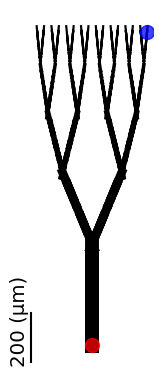

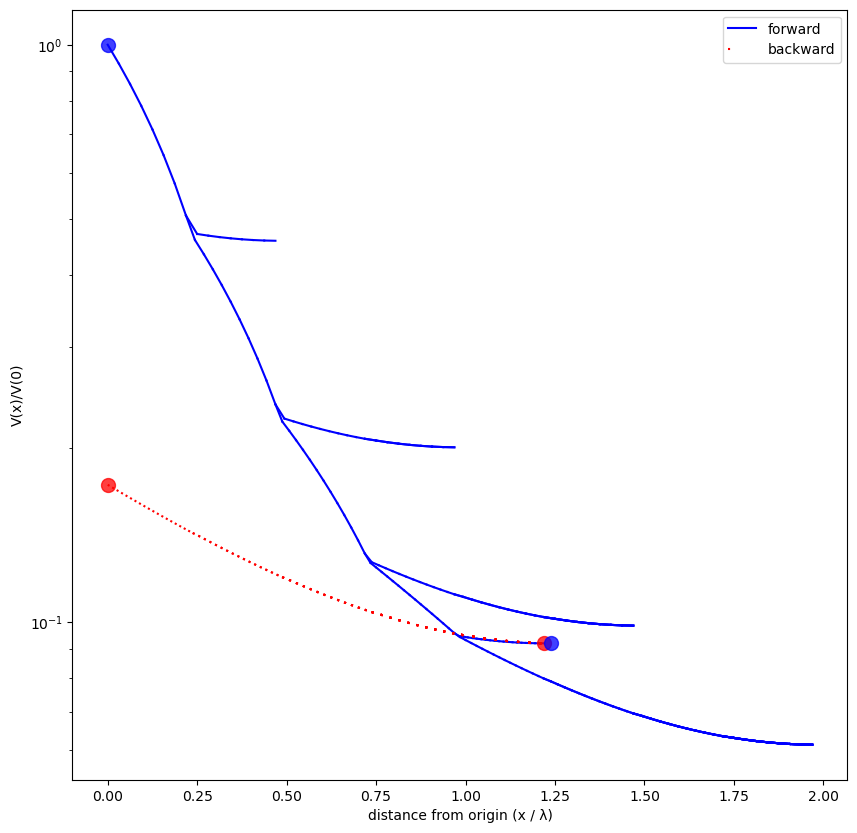

In [5]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

colors_dict = deepcopy(analyser.colors_dict)
plt.figure()
colors_dict1 = {key:'k' for key in colors_dict.keys()}
analyser.change_color_dict(colors_dict1)

seg_to_indicate_dict =dict()
seg_to_indicate_dict[list(analyser.cell.soma[0])[0]]=dict(size=100, color='r', alpha=0.75)
seg_to_indicate_dict[list(analyser.cell.apic[29])[-1]]=dict(size=100, color='b', alpha=0.75)
analyser.plot_morph(ax=plt.gca(), theta=0, seg_to_indicate_dict=seg_to_indicate_dict, scale=200, diam_factor=1)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colors_dict2 = {key:'b' for key in colors_dict.keys()}
analyser.change_color_dict(colors_dict2)

ax, norm_by = analyser.plot_attanuation(protocol=long_pulse_protocol, ax=ax, start_seg=list(analyser.cell.apic[29])[-1], seg_to_indicate_dict=seg_to_indicate_dict, label='forward')

colors_dict3 =  {key:'r' for key in colors_dict.keys()}
analyser.change_color_dict(colors_dict3)
ax, norm_by = analyser.plot_attanuation(protocol=long_pulse_protocol, ax=ax, start_seg=list(analyser.cell.soma[0])[0], norm=False, norm_by=norm_by, seg_to_indicate_dict=seg_to_indicate_dict, ls='--', dashes=(1, 100), label='backward')
analyser.change_color_dict(colors_dict)

ax.legend()
legend_without_duplicate_labels(ax)


optimizing lines: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 47144.10it/s]


<AxesSubplot:>

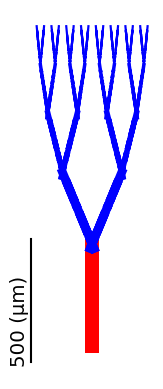

In [5]:
analyser.plot_morph(scale=500, diam_factor=1)

In [3]:
show_records_from = [list(analyser.cell.soma[0])[0], list(analyser.cell.apic[29])[-1]]
record_dict, time = analyser.record_protocol(cut_start_ms=1000.0, record_name='v')
animation = analyser.create_movie_from_rec(record_dict=record_dict, time=time, fps=10, clip_name='bAP_rall_tree', threads=4, slow_down_factor=50, func_for_missing_frames=np.max, theta=-90, diam_factor=0.5, show_records_from=show_records_from)
animation.ipython_display(fps=10, loop=True, autoplay=True)


TypeError: cannot unpack non-iterable record_all object

optimizing lines: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 81878.73it/s]


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


ValueError: The duration of video __temp__.mp4 (62.0) exceeds the 'maxduration' attribute. You can increase 'maxduration', by passing 'maxduration' parameterto ipython_display function.But note that embedding large videos may take all the memory away !

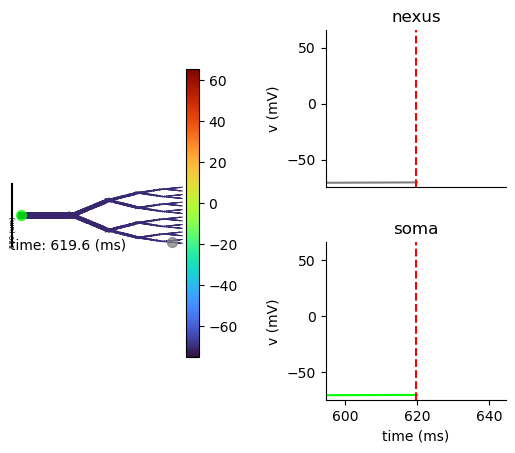

In [4]:
show_records_from = dict()
nexus_sec = list(analyser.cell.apic[29])
show_records_from[list(analyser.cell.soma[0])[0]] = dict(label='soma', alpha=0.75, color='lime', size=50)
show_records_from[list(nexus_sec)[len(nexus_sec)//2]] = dict(label='nexus', alpha=0.75, color='grey', size=50)

plt.close()
records = analyser.record_protocol(cut_start_ms=1000.0, record_name='v')
animation = analyser.create_movie_from_rec(records=records, slow_down_factor=100, 
                                           func_for_missing_frames=np.max, theta=-90, diam_factor=0.5,
                                           show_records_from=show_records_from, 
                                           seg_to_indicate_dict=dict(), margin=0)
animation.ipython_display(fps=25, loop=True, autoplay=True)